## Domanda Teorica

Descrivere con proprie parole (not CHAT-GPT oriented) il concetto di time series forecasting e cosa lo differenzia dai problemi ri regressione standard, fornendo esempi ed applicazioni/limiti.

La previsione delle serie temporali è un po' come guardare indietro lungo un tragitto che hai percorso e cercare di indovinare dove ti porterà se continuerai a seguirlo. Utilizzi le tue esperienze passate (i dati storici) per fare una previsione sul futuro. Potrebbe essere usato per cercare di prevedere quanto gelato venderà un negozio il prossimo mese, basandosi su quanto ne ha venduto nei mesi precedenti.

Questo è diverso dalla regressione standard, dove invece stai cercando di capire come diverse variabili si influenzano a vicenda. come ad esempio potresti cercare di capire come il prezzo di una casa è influenzato dalla sua dimensione, dalla sua età o dal numero di stanze che ha. L'ordine temporale non ha importanza qui  stai solo cercando di capire la relazione tra le variabili.

In sostanza, la previsione delle serie temporali si basa sull'idea che il futuro è, in qualche modo, un riflesso del passato, mentre la regressione standard si basa sull'idea che possiamo capire le cose meglio esaminando come sono collegate tra loro. Entrambi gli approcci hanno i loro vantaggi e svantaggi, e possono essere molto utili a seconda della situazione.

## Fake news Detection

In [1]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv
path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [2]:
import numpy as np
import pandas as pd
import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_fake = pd.read_csv(path_fake)
df_true = pd.read_csv(path_true)
df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_marge = pd.concat([df_fake, df_true], axis =0 )
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,text,class
0,BEIRUT (Reuters) - From the moment Saad al-Har...,1
1,MOSCOW (Reuters) - Russian President Vladimir ...,1
2,"No matter what you think of former First Lady,...",0
3,Megyn Kelly started out like a shooting star a...,0
4,CARACAS (Reuters) - Venezuelan President Nicol...,1
...,...,...
44893,Reports from several sources revealed on Novem...,0
44894,White House Chief Strategist Stephen K. Bannon...,0
44895,"On Tuesday afternoon, Miami-Dade Police tweete...",0
44896,"Just hours before the presidential election, P...",0


In [8]:

patterns = {
            r'\d+': '',             # remove digits (numeri)
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

#solo in preview
clean_column(df, 'text', patterns)

,text,class
0,beirut reuters from the moment saad alhariri p...,1
1,moscow reuters russian president vladimir puti...,1
2,matter what you think former first lady senat...,0
3,megyn kelly started out like shooting star anc...,0
4,caracas reuters venezuelan president nicolas m...,1
...,...,...
44893,reports from several sources revealed november...,0
44894,white house chief strategist stephen bannon ha...,0
44895,tuesday afternoon miamidade police tweeted pi...,0
44896,just hours before the presidential election pr...,0


In [9]:
df = clean_column(df, 'text', patterns)
df

,text,class
0,beirut reuters from the moment saad alhariri p...,1
1,moscow reuters russian president vladimir puti...,1
2,matter what you think former first lady senat...,0
3,megyn kelly started out like shooting star anc...,0
4,caracas reuters venezuelan president nicolas m...,1
...,...,...
44893,reports from several sources revealed november...,0
44894,white house chief strategist stephen bannon ha...,0
44895,tuesday afternoon miamidade police tweeted pi...,0
44896,just hours before the presidential election pr...,0


In [11]:
df['class'].value_counts()

0    23481
1    21417
Name: class, dtype: int64

In [12]:
df['text'].head(10)

0    beirut reuters from the moment saad alhariri p...
1    moscow reuters russian president vladimir puti...
2     matter what you think former first lady senat...
3    megyn kelly started out like shooting star anc...
4    caracas reuters venezuelan president nicolas m...
5     will confess belong faction the left that hat...
6    dhaka reuters bangladesh and myanmar have agre...
7    united nations reuters north korea does not ca...
8     didn know better almost believe our federal g...
9    douala cameroon reuters military court cameroo...
Name: text, dtype: object

In [45]:
df.to_csv('cleaned_data.csv', index=False)


In [19]:
text_fake = ' '.join(df[df['class']==0]['text'].values)
text_true = ' '.join(df[df['class']==1]['text'].values)


text_fake = ''.join(text_fake)
text_true = ''.join(text_true)


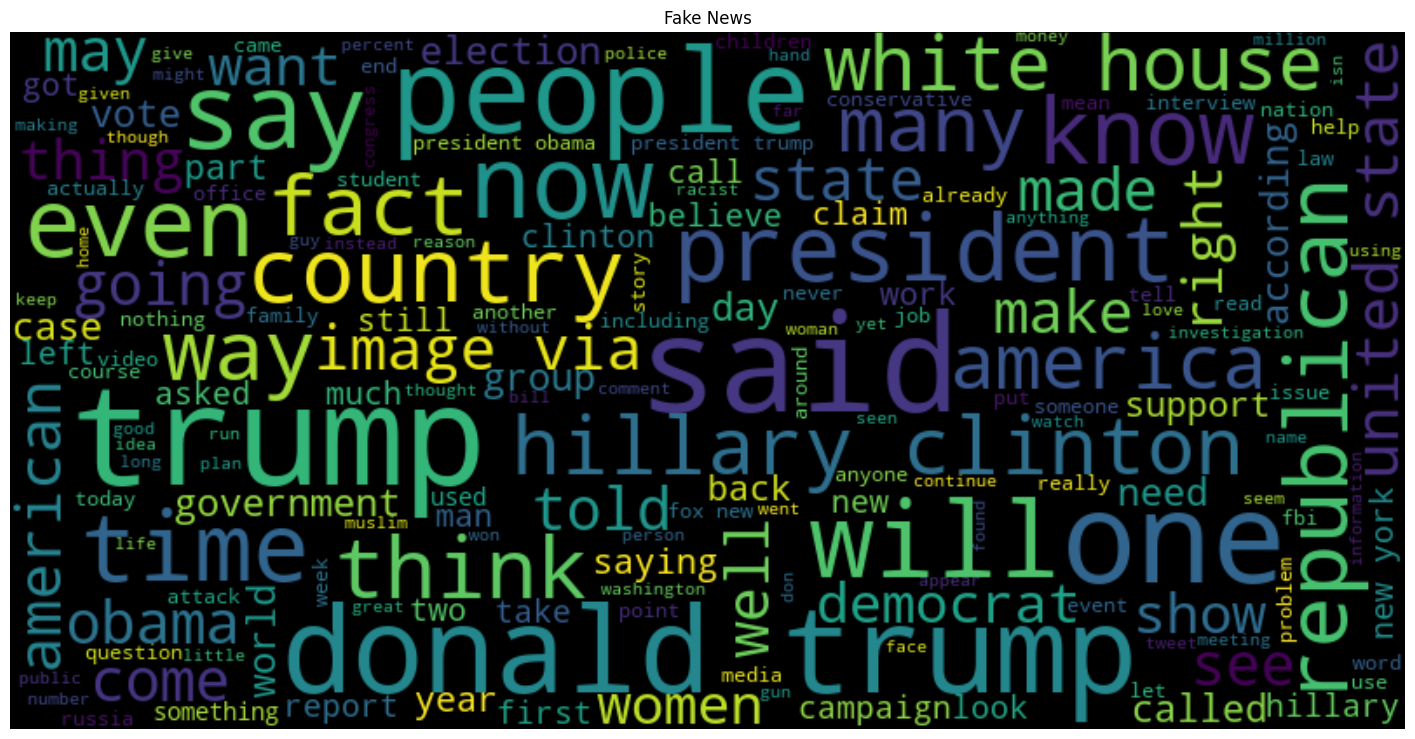

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='black', width=800, height=400,
                      max_words=180, contour_width=3,
                      max_font_size=80, contour_color='steelblue',
                      stopwords=STOPWORDS, random_state=667)

# Generate wordcloud for fake news
text_fake = ' '.join(df[df['class']==0]['text'].values)
wordcloud.generate(text_fake)

plt.figure(figsize=(18,10))
plt.title('Fake News')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

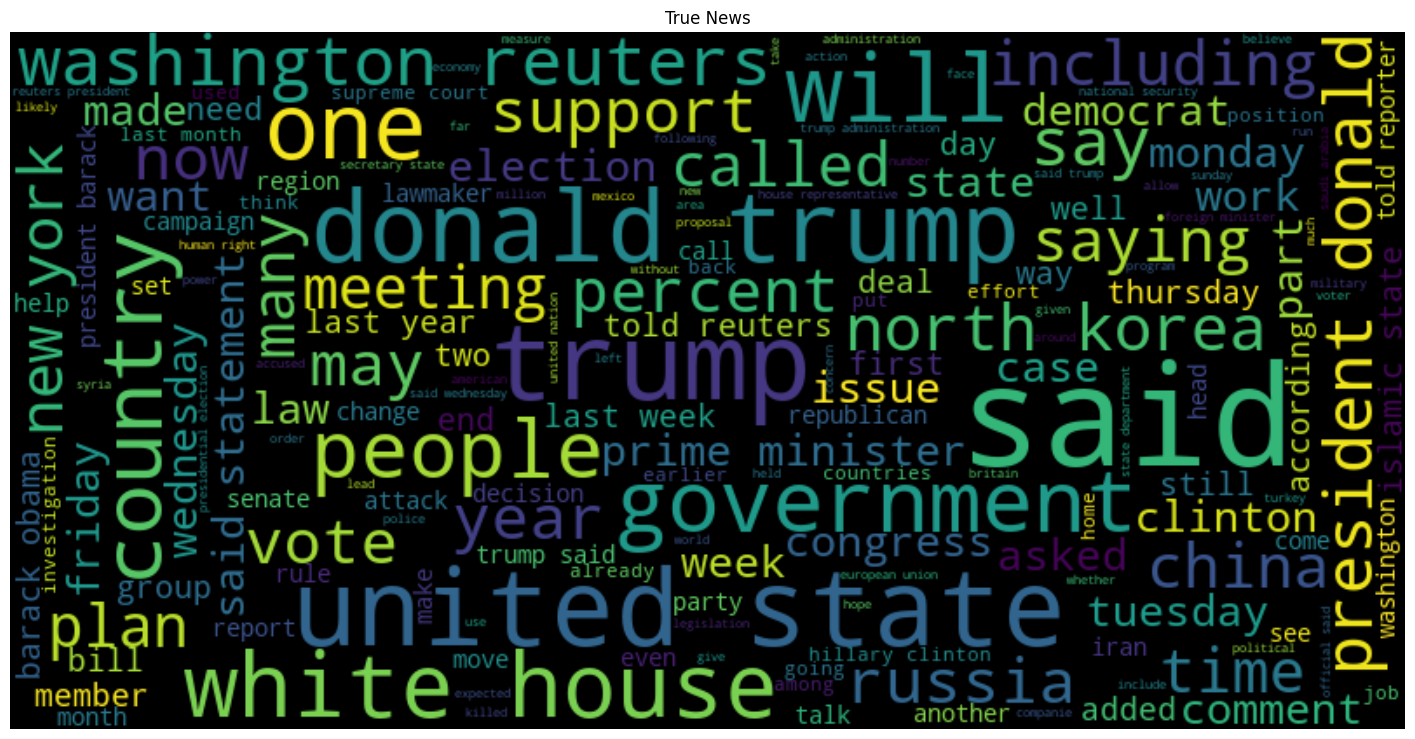

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='black', width=800, height=400,
                      max_words=180, contour_width=3,
                      max_font_size=80, contour_color='steelblue',
                      stopwords=STOPWORDS, random_state=667)


text_true = ' '.join(df[df['class']==1]['text'].values)
wordcloud.generate(text_true)

plt.figure(figsize=(18,10))
plt.title('True News')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
df = df[['text','class']]

In [25]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [26]:
df = df.dropna()

In [29]:
##STEP 3: Definizre X e y (features testuali e Target)
## rimuovere eventuali nan

X = df['text']
y = df['class']

print(X.shape)

(44898,)


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
#vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 4, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 4, 0, 0],
       [0, 0, 0, ..., 2, 0, 0]], dtype=int64)

In [31]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14064633, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.09896497, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16335106, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10590777, 0.        ,
        0.        ]])

In [32]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [33]:
##STEP 7: Modellazione
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9844097995545658

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7124
           1       0.93      0.94      0.93      6346

    accuracy                           0.94     13470
   macro avg       0.93      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



Text(95.72222222222221, 0.5, 'Actual')

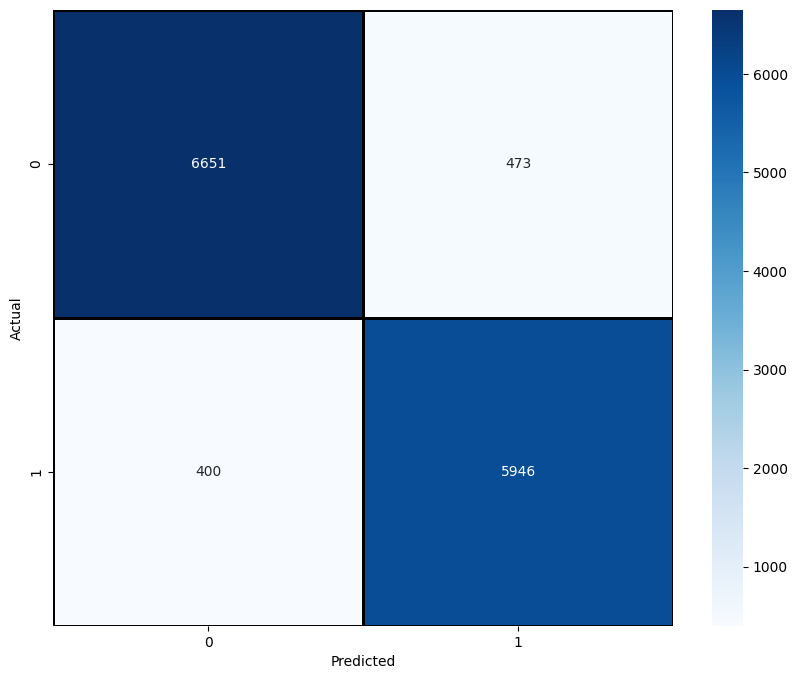

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [37]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf = MultinomialNB(alpha=0.1)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9352635486265776


In [38]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7124
           1       0.93      0.94      0.93      6346

    accuracy                           0.94     13470
   macro avg       0.93      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



Text(95.72222222222221, 0.5, 'Actual')

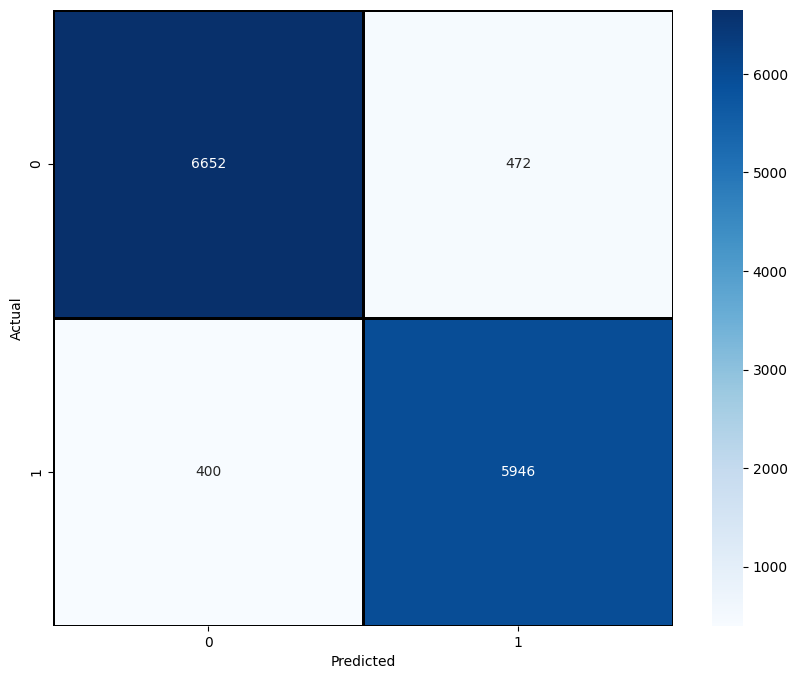

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [40]:
# Step 10: Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.92873686 0.93301265 0.93193158 0.93709907 0.93335709 0.93371347
 0.93121882 0.93300071]
mean=0.9327587814168286
std=0.0022209831229130787


In [41]:
import joblib
joblib.dump(pipe,'NLPEs2.pkl')

['NLPEs2.pkl']

In [43]:
import joblib

uploaded_model = joblib.load('NLPEs2.pkl')
pred = uploaded_model.predict(['very ugly'])

# Map the output
output_map = {0: 'fake', 1: 'true'}
output = output_map[pred[0]]

print(output)


fake


In [44]:
import joblib

uploaded_model = joblib.load('NLPEs2.pkl')
pred = uploaded_model.predict(['gods king'])

# Map the output
output_map = {0: 'fake', 1: 'true'}
output = output_map[pred[0]]

print(output)


fake
